In [3]:
import sys
sys.path.append('../training_performance')

import platform
from pathlib import Path
from datetime import datetime, timedelta
import datajoint as dj
dj.blob.use_32bit_dims = True # necessary for pd.blob read

from create_trials_df import create_trials_df_from_dj
from create_days_df import create_days_df_from_dj, lazy_load_days_summary_df

from multiplot_summaries import *

import plot_utils as pu
import dj_utils as dju
import dir_utils as du

from plot_trials_info import *
from plot_days_info import *

import seaborn as sns
import pandas as pd
# settings
%load_ext autoreload
%autoreload 2
sns.set_context("talk")

[2023-08-25 10:42:38,036][INFO]: Connecting jbreda@bdata00.pni.princeton.edu:3306
[2023-08-25 10:42:39,353][INFO]: Connected jbreda@bdata00.pni.princeton.edu:3306


### Load in rats and mice



In [4]:
# ANIMALS
rats = ["R013", "R014", "R015"]
mice = [
    "R511",
    "R512",
    "R513",
    "R621",
    "R622",
    "R623",
    "R624",
]

rat_df = create_trials_df_from_dj(animal_ids=rats)
mouse_df = create_trials_df_from_dj(animal_ids=mice)
# rat_df.loc[
#     rat_df["cpoke_dur"] < 0, "cpoke_dur"
# ] = pd.NA  # todo- add to create trials df
# DATES
# date_min, date_max = dju.return_date_window(latest_date="2023-08-04", n_days_back=7)

fetched 33 sessions for R013 between 2023-07-14 and 2023-08-24
fetched 33 sessions for R014 between 2023-07-14 and 2023-08-24
fetched 33 sessions for R015 between 2023-07-14 and 2023-08-24
fetched 36 sessions for R511 between 2023-07-12 and 2023-08-24
fetched 36 sessions for R512 between 2023-07-12 and 2023-08-24
fetched 35 sessions for R513 between 2023-07-12 and 2023-08-24
fetched 23 sessions for R621 between 2023-07-26 and 2023-08-24
fetched 23 sessions for R622 between 2023-07-26 and 2023-08-24
fetched 22 sessions for R623 between 2023-07-26 and 2023-08-24
fetched 23 sessions for R624 between 2023-07-26 and 2023-08-24


In [5]:
rat_df = rat_df.reset_index(drop=True)
mouse_df = mouse_df.reset_index(drop=True)

N days to center poke for rats & mice



In [51]:
rat_df.query("stage < 8").groupby(["animal_id"]).date.nunique().mean()

20.666666666666668

In [53]:
mouse_df.query("stage < 8").groupby(["animal_id"]).date.nunique()

animal_id
R511    36
R512    27
R513    26
R621    23
R622    23
R623    22
R624    23
Name: date, dtype: int64

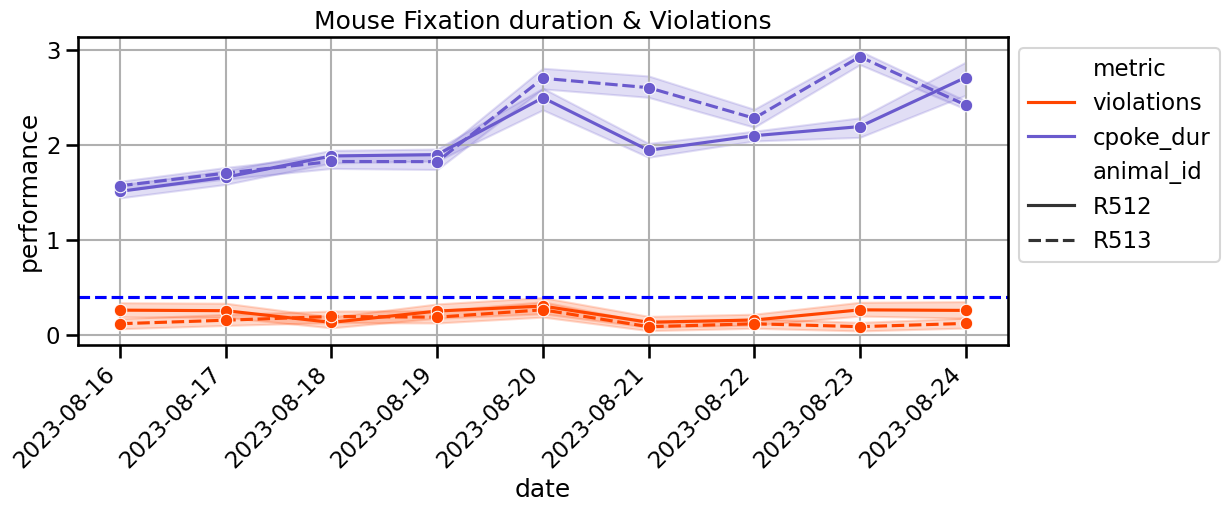

In [57]:
fig, ax = pu.make_fig()
sub_df = mouse_df.query("stage >=8")

melt_df = sub_df.melt(
    id_vars=["animal_id", "date"],
    value_vars=["violations", "cpoke_dur"],
    value_name="performance",
    var_name="metric",
)

sns.lineplot(
    data=melt_df,
    x="date",
    y="performance",
    hue="metric",
    palette=["orangered", "slateblue"],
    style="animal_id",
    ax=ax,
    marker="o",
)

pu.set_date_x_ticks(ax, xaxis_label=True)
ax.grid()
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
ax.set_title("Mouse Fixation duration & Violations")
ax.axhline(0.4, ls="--", color="b")

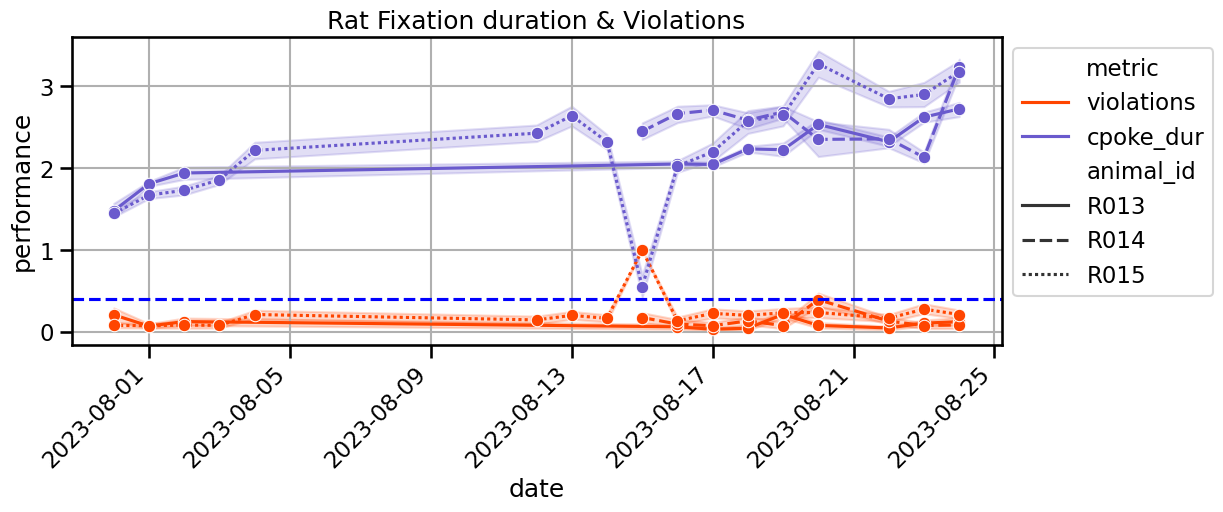

In [56]:
fig, ax = pu.make_fig()
sub_df = rat_df.query("stage >=8")

melt_df = sub_df.melt(
    id_vars=["animal_id", "date"],
    value_vars=["violations", "cpoke_dur"],
    value_name="performance",
    var_name="metric",
)

sns.lineplot(
    data=melt_df,
    x="date",
    y="performance",
    hue="metric",
    palette=["orangered", "slateblue"],
    style="animal_id",
    ax=ax,
    marker="o",
)

pu.set_date_x_ticks(ax, xaxis_label=True)
ax.grid()
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
ax.set_title("Rat Fixation duration & Violations")
ax.axhline(0.4, ls="--", color="b")